In [1]:
import os
from pathlib import Path
import sys

# set working directory to the module's home
cwd = os.getcwd()
os.chdir(Path(cwd).parents[1])

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, normalize, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

from config import connect

In [3]:
conn = connect()
cursor = conn.cursor()

In [4]:
q = "SELECT * FROM AQI.combined WHERE State='California'"
cursor.execute(q)

In [5]:
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]
print(field_names)

['Year', 'State', 'Parameter', 'AQI', 'Age_Group', 'Population', 'CP_deaths', 'Total_deaths', 'Pct_CP_Death']


In [6]:
table_rows = cursor.fetchall()

In [7]:
df = pd.DataFrame(table_rows, columns=field_names)
df.head()

,Year,State,Parameter,AQI,Age_Group,Population,CP_deaths,Total_deaths,Pct_CP_Death
0,1980,California,CO,65.78,< 1 year,402949.0,214.0,4454.0,4.80
1,1980,California,CO,65.78,1-4 years,1366732.0,82.0,824.0,9.95
2,1980,California,CO,65.78,5-9 years,1650348.0,48.0,497.0,9.66
3,1980,California,CO,65.78,10-14 years,1796019.0,42.0,541.0,7.76
4,1980,California,CO,65.78,15-19 years,2130465.0,106.0,2269.0,4.67


In [8]:
df.count()

Year            2691
State           2691
Parameter       2691
AQI             2691
Age_Group       2665
Population      2665
CP_deaths       2665
Total_deaths    2665
Pct_CP_Death    2665
dtype: int64

In [9]:
# df = df.dropna()
# df.count()

In [10]:
year_df = df.groupby('Year').agg({'AQI': np.mean, 'Population': np.sum, 'CP_deaths': np.sum, 'Total_deaths': np.sum})
year_df = year_df.replace(0, np.nan)
year_df

,AQI,Population,CP_deaths,Total_deaths
Year,,,,
1980,67.695000,94916732.0,408684.0,746056.0
1981,62.265000,97377092.0,402636.0,739360.0
1982,59.370000,99480732.0,410060.0,753228.0
1983,57.027500,101593772.0,409200.0,753012.0
1984,60.415000,103527404.0,420704.0,781488.0
1985,57.550000,132442560.0,541695.0,1007280.0
1986,58.274000,135748460.0,533705.0,1013660.0
1987,54.188000,139172890.0,550645.0,1046200.0
1988,57.613333,171231168.0,682650.0,1291878.0


<AxesSubplot:xlabel='Year'>

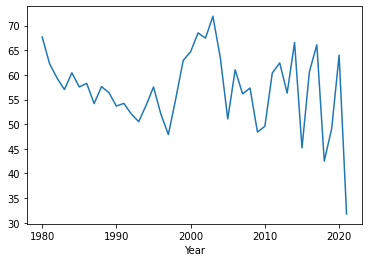

In [11]:
year_df.AQI.plot()

<AxesSubplot:xlabel='Year'>

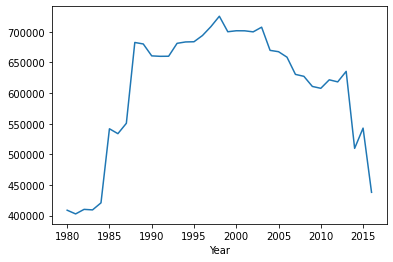

In [12]:
year_df.CP_deaths.plot()

In [13]:
df

,Year,State,Parameter,AQI,Age_Group,Population,CP_deaths,Total_deaths,Pct_CP_Death
0,1980,California,CO,65.78,< 1 year,402949.0,214.0,4454.0,4.80
1,1980,California,CO,65.78,1-4 years,1366732.0,82.0,824.0,9.95
2,1980,California,CO,65.78,5-9 years,1650348.0,48.0,497.0,9.66
3,1980,California,CO,65.78,10-14 years,1796019.0,42.0,541.0,7.76
4,1980,California,CO,65.78,15-19 years,2130465.0,106.0,2269.0,4.67
...,...,...,...,...,...,...,...,...,...
2686,2020,California,SO2,128.00,None,NaN,NaN,NaN,NaN
2687,2021,California,CO,4.67,None,NaN,NaN,NaN,NaN
2688,2021,California,Ozone,37.59,None,NaN,NaN,NaN,NaN
2689,2021,California,PM10,40.17,None,NaN,NaN,NaN,NaN


In [225]:
df.dtypes

Year              int64
State            object
Parameter        object
AQI             float64
Age_Group        object
Population      float64
CP_deaths       float64
Total_deaths    float64
Pct_CP_Death    float64
dtype: object

In [226]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)

State
Parameter
Age_Group


In [216]:
cleaned_df = pd.get_dummies(
    df.dropna(), columns=[
        'Parameter', 'Age_Group']
).drop(columns=['Year', 'State', 'CP_deaths', 'Total_deaths', 'Population'
    ])
cleaned_df.AQI = cleaned_df.AQI.astype(int) 
cleaned_df.Pct_CP_Death = cleaned_df.Pct_CP_Death.astype(int)
# cleaned_df.Population = cleaned_df.Population.astype(int)
# cleaned_df["Pct_CP_Death"] = (5 * round(cleaned_df.Pct_CP_Death/5)).astype(int)
cleaned_df

,AQI,Pct_CP_Death,Parameter_CO,Parameter_NO2,Parameter_Ozone,Parameter_PM10,Parameter_PM2.5,Parameter_SO2,Age_Group_1-4 years,Age_Group_10-14 years,...,Age_Group_20-24 years,Age_Group_25-34 years,Age_Group_35-44 years,Age_Group_45-54 years,Age_Group_5-9 years,Age_Group_55-64 years,Age_Group_65-74 years,Age_Group_75-84 years,Age_Group_85+ years,Age_Group_< 1 year
0,65.78,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,65.78,9,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,65.78,9,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,65.78,7,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,65.78,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,52.26,28,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2661,52.26,33,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2662,52.26,39,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2663,52.26,45,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [217]:
X = cleaned_df.drop(columns=['Pct_CP_Death'])
y = cleaned_df.Pct_CP_Death

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [219]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [244]:
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
}
gscv_rfr = GridSearchCV(rf_reg, parameters).fit(X_train, y_train)

In [247]:
best_params = gscv_rfr.best_params_
best_params

{'max_features': 'log2', 'n_estimators': 150}

In [246]:
gscv_rfr.best_score_

0.9759598230118713

In [251]:
rf_reg_tuned = RandomForestRegressor(**best_params)
rf_reg_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=150)

In [259]:
y_predict_train = np.round(rf_reg_tuned.predict(X_train))
y_predict_test = np.round(rf_reg_tuned.predict(X_test))

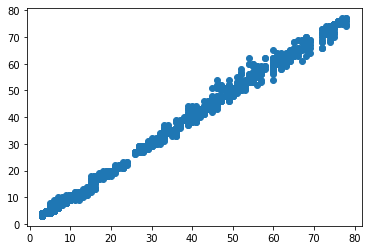

In [260]:
plt.scatter(y_train, y_predict_train)

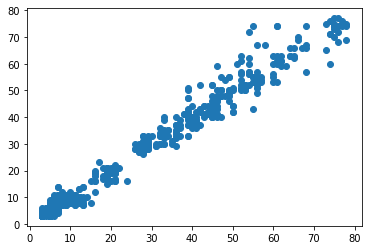

In [261]:
plt.scatter(y_test, y_predict_test)

In [265]:
rf_reg.score(X_train, y_predict_train)

0.9993290582533062

In [266]:
rf_reg.score(X_test, y_predict_test)

0.9957916198881731

In [264]:
y_predict_train

array([11.,  8., 27., ...,  7.,  6., 59.])